In [2]:
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
def load_dataset(csv): 
    data = pd.read_csv(csv)
    data = data.drop_duplicates()
    data = data.dropna()
    return data
data = load_dataset("Visa_For_Lisa_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


(5000, 14) 

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object') 

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000 

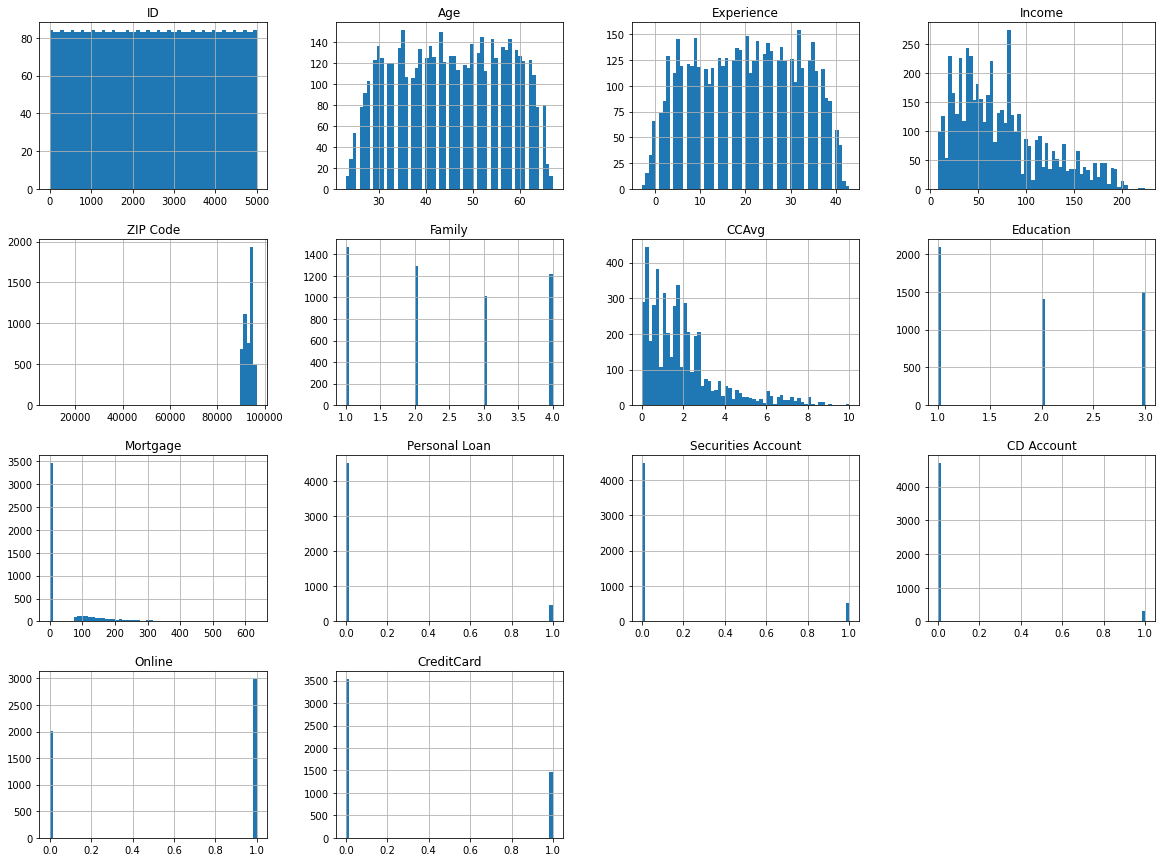

In [5]:
def exploration(data):
    print(data.shape, "\n")
    print(data.columns, "\n")
    print(data.describe(), "\n")
    print(data.info(), "\n")
    data.hist(bins=60, figsize = (20, 15))
exploration(data) 

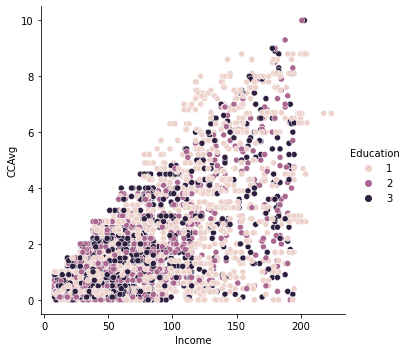

In [6]:
sns.relplot(data=data, x="Income", y="CCAvg", hue="Education")

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

<AxesSubplot:>

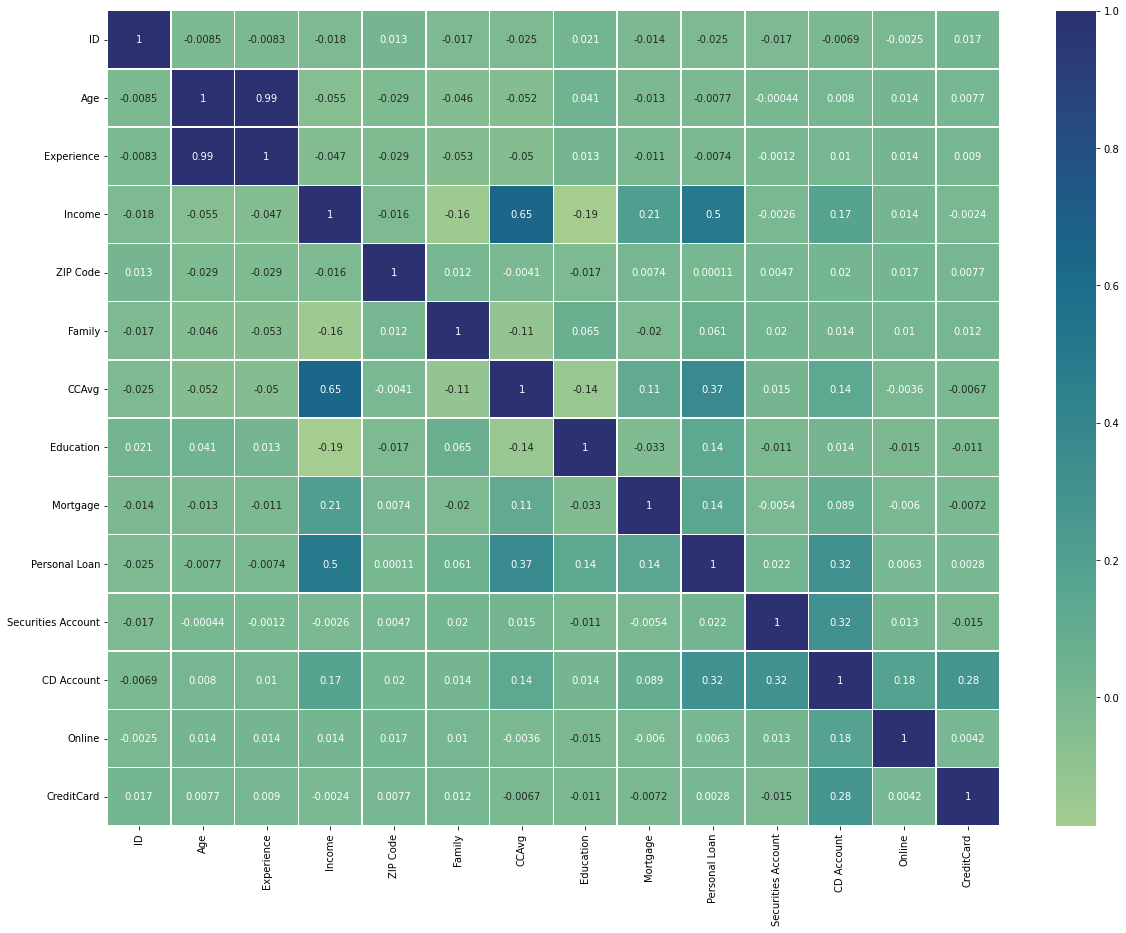

In [7]:
corr_data = data.corr()
print(corr_data)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_data, annot=True, linewidth=.5, cmap="crest") 

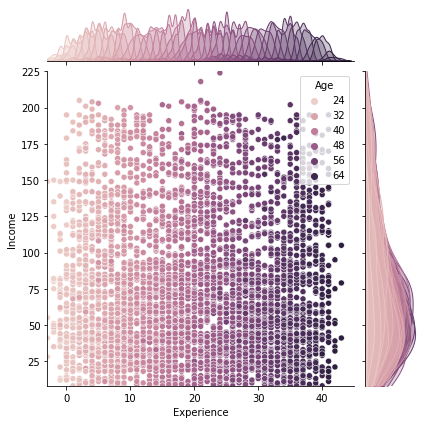

In [8]:
sns.jointplot(data=data, x="Experience", y="Income", hue="Age", dropna=True, 
              xlim=(-3, 45), ylim=(8, 225))

In [9]:
def SimpleLinearRegression(data):
    X = data.iloc[:, 6].values.reshape(-1, 1)
    y = data.iloc[:, 3]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    print(f"R2 score: {round(r2_score(y_test, y_pred)*100)}%")
    print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean absolute erroor: {mean_absolute_error(y_test, y_pred)}")
SimpleLinearRegression(data)

R2 score: 44%
Mean squared error: 1235.1423945311162
Mean absolute erroor: 27.23825077358514


In [10]:
def MultipleLinearRegression(data):
    X = data.drop(columns=['Income'])
    y = data.iloc[:, 3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    print(f"R2 score: {round(r2_score(y_test, y_pred)*100)}%")
    print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean absolute erroor: {mean_absolute_error(y_test, y_pred)}")
MultipleLinearRegression(data)

R2 score: 56%
Mean squared error: 969.630268796983
Mean absolute erroor: 24.676703301988756


In [11]:
def Classification(data):
    X = data.drop(columns=["CreditCard", "ID", "ZIP Code"])
    y = data["CreditCard"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
    log = LogisticRegression().fit(X_train, y_train)
    knr = KNeighborsRegressor().fit(X_train, y_train)
    y_pred = log.predict(X_test)
    print(f"Accurancy score: {round(accuracy_score(y_test, y_pred)*100)}%")
    print(f"Coefficient: {log.coef_[0][9]}")
    print(f"Intercept: {log.intercept_[0]}")
Classification(data)

Accurancy score: 78%
Coefficient: 3.2578629098558487
Intercept: -0.03674158456041985
